In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
from scipy.fft import fft, ifft
from spafe.features.gfcc import gfcc
from pyAudioProcessing import extract_features
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# Paths for data.
Ravdess = "C:/Users/Andrzej/Desktop/Magisterka/datasets/ravdess/audio_speech_actors_01-24/"
Crema = "C:/Users/Andrzej/Desktop/Magisterka/datasets/cremad/AudioWAV/"
Savee = "C:/Users/Andrzej/Desktop/Magisterka/datasets/savee/"
Tess = "C:/Users/Andrzej/Desktop/Magisterka/datasets/tess/TESS Toronto emotional speech set data/"

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:/Users/Andrzej/Desktop/Magisterka/datasets/r...
1,neutral,C:/Users/Andrzej/Desktop/Magisterka/datasets/r...
2,neutral,C:/Users/Andrzej/Desktop/Magisterka/datasets/r...
3,neutral,C:/Users/Andrzej/Desktop/Magisterka/datasets/r...
4,neutral,C:/Users/Andrzej/Desktop/Magisterka/datasets/r...


In [4]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,C:/Users/Andrzej/Desktop/Magisterka/datasets/c...
1,disgust,C:/Users/Andrzej/Desktop/Magisterka/datasets/c...
2,fear,C:/Users/Andrzej/Desktop/Magisterka/datasets/c...
3,happy,C:/Users/Andrzej/Desktop/Magisterka/datasets/c...
4,neutral,C:/Users/Andrzej/Desktop/Magisterka/datasets/c...


In [5]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        file_emotion.append('angry')
    elif ele == 'd':
        file_emotion.append('disgust')
    elif ele == 'f':
        file_emotion.append('fear')
    elif ele == 'h':
        file_emotion.append('happy')
    elif ele == 'n':
        file_emotion.append('neutral')
    elif ele == 'sa':
        file_emotion.append('sad')
    else:
        pass
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,C:/Users/Andrzej/Desktop/Magisterka/datasets/s...
1,angry,C:/Users/Andrzej/Desktop/Magisterka/datasets/s...
2,angry,C:/Users/Andrzej/Desktop/Magisterka/datasets/s...
3,angry,C:/Users/Andrzej/Desktop/Magisterka/datasets/s...
4,angry,C:/Users/Andrzej/Desktop/Magisterka/datasets/s...


In [6]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            pass
        else:
            file_emotion.append(part)
            file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,C:/Users/Andrzej/Desktop/Magisterka/datasets/t...
1,angry,C:/Users/Andrzej/Desktop/Magisterka/datasets/t...
2,angry,C:/Users/Andrzej/Desktop/Magisterka/datasets/t...
3,angry,C:/Users/Andrzej/Desktop/Magisterka/datasets/t...
4,angry,C:/Users/Andrzej/Desktop/Magisterka/datasets/t...


In [7]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Savee_df, Tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,C:/Users/Andrzej/Desktop/Magisterka/datasets/r...
1,neutral,C:/Users/Andrzej/Desktop/Magisterka/datasets/r...
2,neutral,C:/Users/Andrzej/Desktop/Magisterka/datasets/r...
3,neutral,C:/Users/Andrzej/Desktop/Magisterka/datasets/r...
4,neutral,C:/Users/Andrzej/Desktop/Magisterka/datasets/r...


In [8]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(data_path, test_size=0.3)

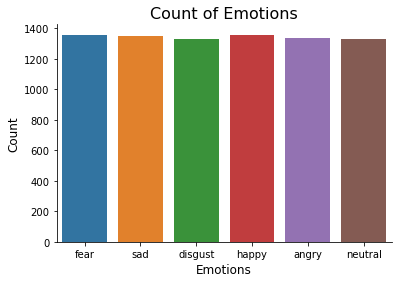

In [9]:
plt.title('Count of Emotions', size=16)
sns.countplot(train_data.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [10]:
train_data.Emotions

2641       fear
956         sad
1182    disgust
2325       fear
800         sad
         ...   
1791       fear
1226      angry
2029    neutral
456     disgust
5685      angry
Name: Emotions, Length: 8057, dtype: object

In [11]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Emotion: {}'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.savefig('image.png')
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

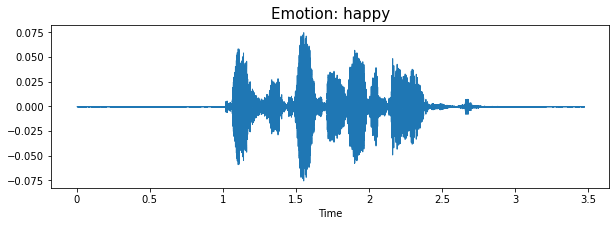

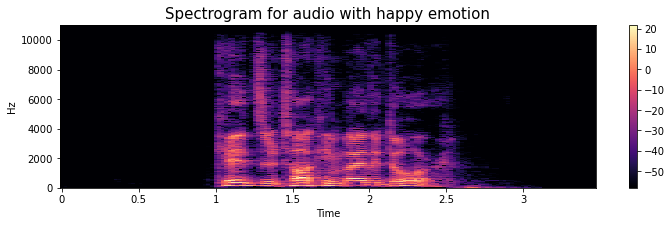

In [12]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

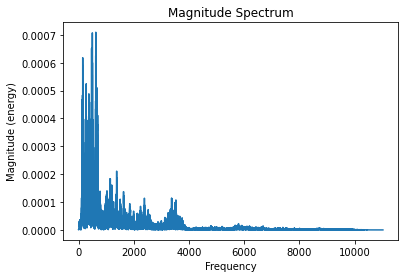

In [15]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
#create_spectrogram(data, sampling_rate, emotion)
#Audio(path)

#plt.figure(figsize=(10, 3))
#plt.title('Emotion: {}'.format(e), size=15)
#librosa.display.waveshow(data, sr=sr)
#plt.savefig('image.png')
#plt.show()

fig, axs = plt.subplots()

axs.set_title("Magnitude Spectrum")
axs.magnitude_spectrum(data, Fs=sampling_rate)
plt.savefig('image.png')
plt.show()

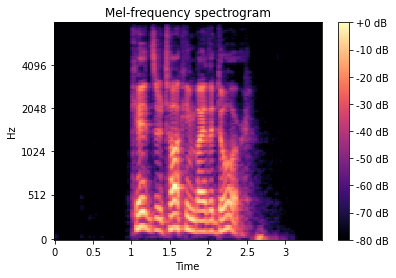

In [30]:
#S = np.mean(librosa.feature.melspectrogram(y=data, sr=sampling_rate).T, axis=0)
S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.savefig('image.png')

In [13]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch_slow(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def stretch_fast(data, rate=1.2):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch_down(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def pitch_up(data, sampling_rate, pitch_factor=1.3):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

In [14]:
def compute_cepstrum(xs):
    cepstrum = np.abs(ifft(np.log(np.absolute(fft(xs)))))
    return cepstrum

def extract_feats(data):
    #data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    result = np.array([])
    
    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # spectral rolloff
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=data).T, axis=0)
    result=np.hstack((result, rolloff)) # stacking horizontally
    
    # centroid
    centroid = np.mean(librosa.feature.spectral_centroid(y=data).T, axis=0)
    result=np.hstack((result, centroid)) # stacking horizontally
    
    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # LPC
    lpc = np.mean(librosa.lpc(y=data, order=16).T, axis=0)
    result=np.hstack((result, lpc)) # stacking horizontally
    
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # GFCC
    #gfccs = np.mean(gfcc(data, fs=sample_rate, num_ceps=13).T, axis=0)
    #get_gfcc = pyAudioProcessing.extract_features.get_features(file = path, feature_names = ["gfcc"])
    #gfccs = get_gfcc['audio'][path]['features']
    #result = np.hstack((result, gfccs)) # stacking horizontally
    
    # cepstrum
    #cepstrum = np.mean(compute_cepstrum(data).T, axis=0)
    #if np.isnan(cepstrum):
    #    result = np.hstack((result, 0))
    #else:
    #    result = np.hstack((result, cepstrum)) # stacking horizontally
    
    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def no_augment(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_feats(data)
    result = np.array(res1)
    
    return result

def get_feats(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_feats(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_feats(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching (slow)
    stretch_data_slow = stretch_slow(data)
    res3 = extract_feats(stretch_data_slow)
    result = np.vstack((result, res3)) # stacking vertically
    
    # data with stretching (fast)
    stretch_data_fast = stretch_fast(data)
    res4 = extract_feats(stretch_data_fast)
    result = np.vstack((result, res4)) # stacking vertically
    
    # data with pitching down
    pitch_data_down = pitch_down(data, sample_rate)
    res5 = extract_feats(pitch_data_down)
    result = np.vstack((result, res5)) # stacking vertically
    
    # data with pitching up
    pitch_data_up = pitch_down(data, sample_rate)
    res6 = extract_feats(pitch_data_up)
    result = np.vstack((result, res6)) # stacking vertically
    
    return result

In [34]:
#data, sample_rate = librosa.load(data_path.Path.iloc[0], duration=2.5, offset=0.6)
#qwe = get_feats(path)
#print(qwe)

In [42]:
%%capture
X, Y = [], []
for path, emotion in zip(train_data.Path, train_data.Emotions):
    feature = get_feats(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [43]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features_train.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,labels
0,0.083487,4164.175415,2146.079926,0.465572,0.437603,0.532545,0.387628,0.269708,0.293012,0.336374,...,0.002934,0.001469,0.000885,0.000895,0.001379,0.000330,0.000109,0.000005,1.142622e-07,happy
1,0.213143,7931.524658,4142.100198,0.586328,0.660227,0.685446,0.526513,0.510748,0.482467,0.461227,...,0.013087,0.011800,0.010896,0.011165,0.011882,0.010956,0.010896,0.010517,1.144681e-02,happy
2,0.097810,4105.305176,2149.192224,0.459642,0.430767,0.542908,0.401046,0.266198,0.288991,0.334957,...,0.001417,0.000882,0.000459,0.000417,0.000648,0.000125,0.000042,0.000002,5.433600e-08,happy
3,0.099163,3987.078728,2092.829313,0.432655,0.455550,0.548855,0.335302,0.263129,0.295365,0.341423,...,0.001534,0.000746,0.000404,0.000424,0.000435,0.000141,0.000050,0.000002,6.307591e-08,happy
4,0.095703,4357.974243,2211.916510,0.479096,0.412899,0.491779,0.326018,0.229240,0.280355,0.326971,...,0.001521,0.002178,0.001298,0.000441,0.000316,0.000380,0.000120,0.000003,4.197526e-08,happy


In [44]:
len(Features)

48342

In [38]:
%%capture
X, Y = [], []
for path, emotion in zip(val_data.Path, val_data.Emotions):
    feature = no_augment(path)
    X.append(feature)
    # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
    Y.append(emotion)

In [39]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features_val.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,labels
0,0.076739,2988.907597,1488.114143,0.530945,0.516316,0.434877,0.547754,0.628913,0.488983,0.614084,...,2.442156e-09,2.266739e-09,2.131631e-09,2.023255e-09,1.936827e-09,1.870230e-09,1.819178e-09,1.784035e-09,1.761965e-09,fear
1,0.102154,4936.976207,2501.673735,0.525127,0.457760,0.504946,0.426411,0.424478,0.547177,0.533927,...,2.897131e-03,1.702371e-03,1.332787e-03,1.090352e-03,6.730515e-04,2.197445e-04,4.121857e-05,3.627383e-06,3.520433e-07,angry
2,0.047984,2302.279412,1111.537731,0.538128,0.514738,0.538554,0.576959,0.564860,0.584554,0.600788,...,1.142729e-09,1.073982e-09,1.020169e-09,9.762028e-10,9.405957e-10,9.129132e-10,8.914704e-10,8.766673e-10,8.672807e-10,happy
3,0.045288,2480.297321,1140.131692,0.548416,0.574784,0.612485,0.564245,0.605637,0.629210,0.734235,...,1.970423e-09,1.833488e-09,1.729574e-09,1.646890e-09,1.581201e-09,1.530772e-09,1.492129e-09,1.465599e-09,1.448878e-09,fear
4,0.080695,3581.311678,1946.264392,0.469363,0.404148,0.387281,0.407598,0.444613,0.441051,0.457387,...,8.967467e-05,8.438397e-05,8.422090e-05,7.480034e-05,5.512181e-05,2.949693e-05,1.057479e-05,6.350967e-07,7.590468e-09,disgust


In [40]:
len(Features)

3453